In [1]:
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer
import nltk
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dataset = pd.read_csv('Base1952Tweets2.csv', encoding='utf-8')

In [3]:
dataset.classe.value_counts()

Negativo    833
Neutro      777
Positivo    340
Name: classe, dtype: int64

In [4]:
dataset.isnull().sum()

Unnamed: 0    0
user          0
text          0
classe        1
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.text.count()

1950

In [8]:
dataset.user.count()

1950

In [9]:
dataset.classe.count()

1950

In [10]:
dataset.head(20)

,Unnamed: 0,user,text,classe
0,0,iG,Governo do Amazonas afirma que mais de 300 mil...,Negativo
1,1,RdLitoral,"A Jovem Pan News – Litoral conversou, na manhã...",Neutro
2,2,klebertorres,Qual a relação da covid-19 com a economia e in...,Neutro
3,3,Unicap,Alunos de Jornalismo e Psicologia desenvolvem ...,Neutro
4,4,CBNCuritiba,Pessoas que se recuperaram da Covid-19 podem d...,Positivo
5,5,studio877,#bentogonçalves #coronavírus | Bento Gonçalves...,Negativo
6,6,itsmarinareis,Eu não sei se eu to com sono/cansada ou com Co...,Negativo
7,7,CoiabAmazonia,"""Intercâmbio de Experiências para a Proteção d...",Neutro
8,8,ClicRDC,Santa Maria é o bairro de Chapecó com mais cas...,Negativo
9,9,MarcosSantosAM,MPAM quer segurança sanitária contra Covid-19 ...,Neutro


Exibe gráfico com rotulação da coluna classe

<AxesSubplot:>

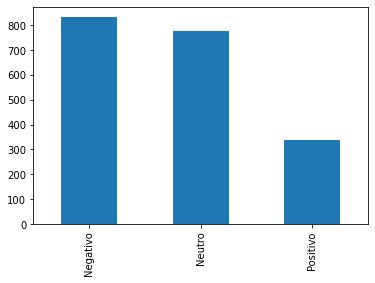

In [19]:
%matplotlib inline
dataset.classe.value_counts().plot(kind='bar')

Buscando os tweets(text) e a rotulação do sentimentos do mesmo da coluna classe do arquivo csv

In [11]:
text = dataset['text']
classe = dataset['classe']

WordCloud - Nuvem de palavras

In [12]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

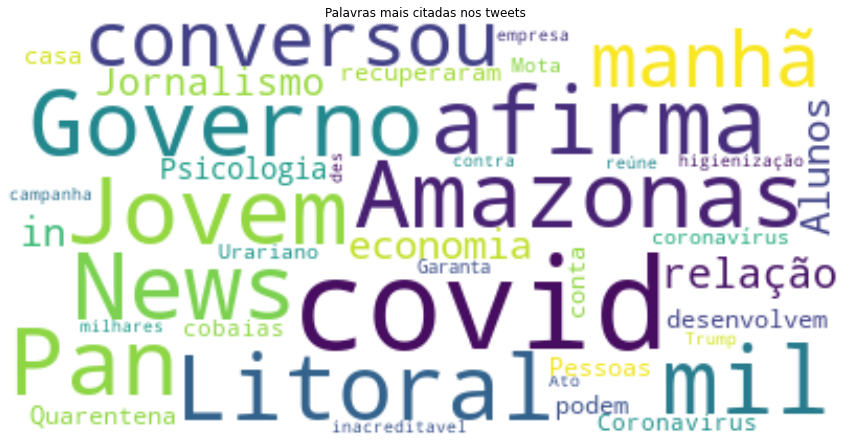

In [392]:
stopwords1 = nltk.corpus.stopwords.words('portuguese')
stopwords2 = nltk.corpus.stopwords.words('english')

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(stopwords = stopwords1, background_color = 'white', max_words = 40, max_font_size = 60).generate(str(text))
    fig = plt.figure(1, figsize = (15, 10))
    plt.axis('off')
    plt.title('Palavras mais citadas nos tweets')
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.show()

show_wordcloud(dataset['text'])

Pré-processamento dos Dados

In [13]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))
text = [RemoveStopWords(i) for i in text]

In [14]:
def limpar_dados(text):
    text = re.sub("RT[\s]+", " ", text).lower()
    text = re.sub("https?://[A-Za-z0-9./]*", " ", text)
    text = re.sub("&amp", " ", text)
    text = re.sub("\n", " ", text)
    dataset.drop_duplicates(['text'], inplace=True)
    return text

Aplica a função de limpar_dados

In [15]:
dataset['text'] = dataset['text'].apply(limpar_dados)

In [16]:
dataset.text.count()

1932

Tokenização dos dados, utilizando o tokenizador de tweets da biblioteca NLTK

In [17]:
from nltk.tokenize import TweetTokenizer

In [18]:
tweet_tokenizer = TweetTokenizer()

Vetorização dos tweets

In [19]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

Aplicar o vetorizador no Texto

In [20]:
tweets_vetorizados = vectorizer.fit_transform(text)
type(tweets_vetorizados)

scipy.sparse.csr.csr_matrix

In [21]:
tweets_vetorizados.shape

(1950, 9907)

Treinamento do modelo de Machine Learning

In [23]:
tweets_vetorizados.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

----------

# Utizando Split-Test, dividindo a base com 30% teste e 70% treinamento

In [140]:
X = vectorizer.fit_transform(dataset["text"])
y = dataset["classe"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1352, 8379)
(580, 8379)
(1352,)
(580,)


.

MULTINOMIAL NAIVE BAYES

Modelo com o sklearn Multinomial Naive Bayes e Acurácia/Predição do modelo

In [166]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_nb))

0.6775862068965517


Acurácia com validação cruzada de 10 páginas

In [169]:
y_predict_nb= cross_val_predict (NB_model, X, y, cv=10)
print(metrics.accuracy_score(y, y_predict_nb))

0.6480331262939959


In [42]:
sentimento =['Positivo','Negativo','Neutro']
print (metrics.classification_report(y,y_predict_nb,sentimento))

              precision    recall  f1-score   support

    Positivo       0.63      0.35      0.45       334
    Negativo       0.63      0.84      0.72       828
      Neutro       0.68      0.57      0.62       770

    accuracy                           0.65      1932
   macro avg       0.65      0.59      0.60      1932
weighted avg       0.65      0.65      0.63      1932



In [145]:
print (pd.crosstab(y, y_predict_nb2, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       699     112        17   828
Neutro         283     437        50   770
Positivo       123      95       116   334
All           1105     644       183  1932


.

BERNOULLI NAIVE BAYES

Modelo com o sklearn Bernoulli Naive Bayes e Acurácia/Predição do modelo

In [147]:
NBBE_model = BernoulliNB()
NBBE_model.fit(X_train, y_train)
y_predict_nbbe = NBBE_model.predict(X_test)
print(accuracy_score(y_test, y_predict_nbbe))

0.6689655172413793


Acurácia com validação cruzada de 10 páginas

In [149]:
y_predict_nbbe = cross_val_predict (NBBE_model, X, y , cv=10)
print(metrics.accuracy_score(y, y_predict_nbbe))

0.6273291925465838


In [352]:
sentimento =['Positivo','Negativo','Neutro']
print (metrics.classification_report(y,y_predict_nbbe,sentimento))

              precision    recall  f1-score   support

    Positivo       0.77      0.10      0.18       334
    Negativo       0.62      0.85      0.72       828
      Neutro       0.63      0.61      0.62       770

    accuracy                           0.63      1932
   macro avg       0.67      0.52      0.51      1932
weighted avg       0.65      0.63      0.59      1932



In [150]:
print (pd.crosstab(y, y_predict_nbbe, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       707     120         1   828
Neutro         290     471         9   770
Positivo       146     154        34   334
All           1143     745        44  1932


.

COMPLEMENT NAIVE BAYES

Modelo com o sklearn Complement Naive Bayes e Acurácia/Predição do modelo

In [153]:
CNB_model = ComplementNB()
CNB_model.fit(X_train, y_train)
y_predict_cnb = CNB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_cnb))

0.6896551724137931


In [154]:
y_predict_cnb = cross_val_predict (CNB_model, X, y , cv=10)
print(metrics.accuracy_score(y, y_predict_cnb))

0.6573498964803313


In [356]:
sentimento =['Positivo','Negativo','Neutro']
print (metrics.classification_report(y,y_predict_cnb,sentimento))

              precision    recall  f1-score   support

    Positivo       0.50      0.60      0.54       334
    Negativo       0.68      0.81      0.74       828
      Neutro       0.73      0.52      0.61       770

    accuracy                           0.66      1932
   macro avg       0.64      0.64      0.63      1932
weighted avg       0.67      0.66      0.65      1932



In [155]:
print (pd.crosstab(y, y_predict_cnb, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       670      95        63   828
Neutro         229     398       143   770
Positivo        80      52       202   334
All            979     545       408  1932


.

GAUSSIAN NAIVE BAYES

Modelo com o sklearn Gaussian Naive Bayes e Acurácia/Predição do modelo

In [156]:
GNB_model = GaussianNB()
GNB_model.fit(X_train.todense(), y_train)
y_predict_gnb = GNB_model.predict(X_test.todense())
print(accuracy_score(y_test, y_predict_gnb))

0.6275862068965518


In [158]:
y_predict_gnb = cross_val_predict (GNB_model, X.todense(), y , cv=10)
print(metrics.accuracy_score(y, y_predict_gnb))

0.5952380952380952


In [360]:
sentimento =['Positivo','Negativo','Neutro']
print (metrics.classification_report(y,y_predict_gnb,sentimento))

              precision    recall  f1-score   support

    Positivo       0.43      0.44      0.44       334
    Negativo       0.62      0.73      0.67       828
      Neutro       0.64      0.52      0.57       770

    accuracy                           0.60      1932
   macro avg       0.57      0.56      0.56      1932
weighted avg       0.60      0.60      0.59      1932



In [159]:
print (pd.crosstab(y, y_predict_gnb, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       605     140        83   828
Neutro         259     397       114   770
Positivo       104      82       148   334
All            968     619       345  1932


.

SUPPORT VECTOR MACHINES - SVM

Modelo com o SVM - Support Vector Machines e Acurácia/Predição do modelo

In [80]:
SVM_model = svm.SVC(C=1.0)
SVM_model.fit(X_train, y_train)
y_predict_svm = SVM_model.predict(X_test)
print(accuracy_score(y_test, y_predict_svm))

0.646551724137931


In [83]:
y_predict_svm = cross_val_predict (SVM_model, X, y, cv=10)
print(metrics.accuracy_score(y, y_predict_svm))

0.6185300207039337


In [41]:
sentimento =['Positivo','Negativo','Neutro']
print (metrics.classification_report(y,y_predict_svm,sentimento))

              precision    recall  f1-score   support

    Positivo       0.86      0.19      0.31       334
    Negativo       0.62      0.76      0.69       828
      Neutro       0.59      0.65      0.62       770

    accuracy                           0.62      1932
   macro avg       0.69      0.53      0.54      1932
weighted avg       0.65      0.62      0.59      1932



In [160]:
print (pd.crosstab(y, y_predict_svm, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       633     194         1   828
Neutro         263     498         9   770
Positivo       120     150        64   334
All           1016     842        74  1932


.

VIZINHOS MAIS PRÓXIMOS CLASSIFICADOR

Modelo com o sklearn K-Neighbors (N-Vizinhos próximos) e Acurácia/Predição do modelo

In [106]:
n_neighbors=10
kvizinhos_model = KNeighborsClassifier(n_neighbors=n_neighbors)
kvizinhos_model.fit(X_train, y_train)
y_predict_kvimodel=kvizinhos_model.predict(X_test)
print(accuracy_score(y_test, y_predict_kvimodel))

0.5344827586206896


In [127]:
y_predict_kvimodel = cross_val_predict (kvizinhos_model, X, y , cv=10)
print(metrics.accuracy_score(y, y_predict_kvimodel))

0.532608695652174


In [93]:
sentimento =['Positivo','Negativo','Neutro']
print (metrics.classification_report(y,y_predict_kvimodel,sentimento))

              precision    recall  f1-score   support

    Positivo       0.59      0.19      0.28       334
    Negativo       0.56      0.59      0.58       828
      Neutro       0.50      0.62      0.56       770

    accuracy                           0.53      1932
   macro avg       0.55      0.47      0.47      1932
weighted avg       0.54      0.53      0.52      1932



In [161]:
print (pd.crosstab(y, y_predict_kvimodel, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       496     319        13   828
Neutro         265     481        24   770
Positivo       105     177        52   334
All            866     977        89  1932


_______________________